In [1]:
!nvidia-smi

Fri Feb 25 13:09:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import cv2
import math
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
import zipfile
zipfile.ZipFile("drive/MyDrive/Newcastle University/Deep Learning/Data/birds_test.zip", 'r').extractall('test/')

In [6]:
seed = 7
np.random.seed(seed)

In [16]:
test_path = "test/test"

In [17]:
# class names list
class_names = ['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR', 'CHIPPING SPARROW', 'CHUKAR PARTRIDGE', 'CINNAMON TEAL', 'COCK OF THE  ROCK', 'COCKATOO', 'COMMON FIRECREST', 'COMMON GRACKLE', 'COMMON HOUSE MARTIN', 'COMMON LOON', 'COMMON POORWILL', 'COMMON STARLING', 'COUCHS KINGBIRD', 'CRESTED AUKLET', 'CRESTED CARACARA', 'CRESTED NUTHATCH', 'CROW', 'CROWNED PIGEON', 'CUBAN TODY', 'CURL CRESTED ARACURI', 'D-ARNAUDS BARBET', 'DARK EYED JUNCO', 'DOWNY WOODPECKER', 'EASTERN BLUEBIRD', 'EASTERN MEADOWLARK', 'EASTERN ROSELLA', 'EASTERN TOWEE', 'ELEGANT TROGON', 'ELLIOTS  PHEASANT', 'EMPEROR PENGUIN', 'EMU', 'EURASIAN GOLDEN ORIOLE', 'EURASIAN MAGPIE', 'EVENING GROSBEAK', 'FIRE TAILLED MYZORNIS', 'FLAME TANAGER', 'FLAMINGO', 'FRIGATE', 'GAMBELS QUAIL', 'GILA WOODPECKER', 'GILDED FLICKER', 'GLOSSY IBIS', 'GO AWAY BIRD', 'GOLD WING WARBLER', 'GOLDEN CHEEKED WARBLER', 'GOLDEN CHLOROPHONIA', 'GOLDEN EAGLE', 'GOLDEN PHEASANT', 'GOLDEN PIPIT', 'GOULDIAN FINCH', 'GRAY CATBIRD', 'GRAY PARTRIDGE', 'GREAT POTOO', 'GREATOR SAGE GROUSE', 'GREEN JAY', 'GREY PLOVER', 'GUINEA TURACO', 'GUINEAFOWL', 'GYRFALCON', 'HARPY EAGLE', 'HAWAIIAN GOOSE', 'HELMET VANGA', 'HOATZIN', 'HOODED MERGANSER', 'HOOPOES', 'HORNBILL', 'HORNED GUAN', 'HORNED SUNGEM', 'HOUSE FINCH', 'HOUSE SPARROW', 'IMPERIAL SHAQ', 'INCA TERN', 'INDIAN BUSTARD', 'INDIAN PITTA', 'INDIGO BUNTING', 'JABIRU', 'JAVA SPARROW', 'JAVAN MAGPIE', 'KAKAPO', 'KILLDEAR', 'KING VULTURE', 'KIWI', 'KOOKABURRA', 'LARK BUNTING', 'LEARS MACAW', 'LILAC ROLLER', 'LONG-EARED OWL', 'MALABAR HORNBILL', 'MALACHITE KINGFISHER', 'MALEO', 'MALLARD DUCK', 'MANDRIN DUCK', 'MARABOU STORK', 'MASKED BOOBY', 'MASKED LAPWING', 'MIKADO  PHEASANT', 'MOURNING DOVE', 'MYNA', 'NICOBAR PIGEON', 'NORTHERN BALD IBIS', 'NORTHERN CARDINAL', 'NORTHERN FLICKER', 'NORTHERN GANNET', 'NORTHERN GOSHAWK', 'NORTHERN JACANA', 'NORTHERN MOCKINGBIRD', 'NORTHERN PARULA', 'NORTHERN RED BISHOP', 'OCELLATED TURKEY', 'OKINAWA RAIL', 'OSPREY', 'OSTRICH', 'OYSTER CATCHER', 'PAINTED BUNTIG', 'PALILA', 'PARADISE TANAGER', 'PARUS MAJOR', 'PEACOCK', 'PELICAN', 'PEREGRINE FALCON', 'PHILIPPINE EAGLE', 'PINK ROBIN', 'PUFFIN', 'PURPLE FINCH', 'PURPLE GALLINULE', 'PURPLE MARTIN', 'PURPLE SWAMPHEN', 'QUETZAL', 'RAINBOW LORIKEET', 'RAZORBILL', 'RED BEARDED BEE EATER', 'RED BELLIED PITTA', 'RED FACED CORMORANT', 'RED FACED WARBLER', 'RED HEADED DUCK', 'RED HEADED WOODPECKER', 'RED HONEY CREEPER', 'RED WINGED BLACKBIRD', 'RED WISKERED BULBUL', 'RING-NECKED PHEASANT', 'ROADRUNNER', 'ROBIN', 'ROCK DOVE', 'ROSY FACED LOVEBIRD', 'ROUGH LEG BUZZARD', 'RUBY THROATED HUMMINGBIRD', 'RUFOUS KINGFISHER', 'RUFUOS MOTMOT', 'SAMATRAN THRUSH', 'SAND MARTIN', 'SCARLET IBIS', 'SCARLET MACAW', 'SHOEBILL', 'SHORT BILLED DOWITCHER', 'SMITHS LONGSPUR', 'SNOWY EGRET', 'SNOWY OWL', 'SORA', 'SPANGLED COTINGA', 'SPLENDID WREN', 'SPOON BILED SANDPIPER', 'SPOONBILL', 'SRI LANKA BLUE MAGPIE', 'STEAMER DUCK', 'STORK BILLED KINGFISHER', 'STRAWBERRY FINCH', 'STRIPPED SWALLOW', 'SUPERB STARLING', 'SWINHOES PHEASANT', 'TAIWAN MAGPIE', 'TAKAHE', 'TASMANIAN HEN', 'TEAL DUCK', 'TIT MOUSE', 'TOUCHAN', 'TOWNSENDS WARBLER', 'TREE SWALLOW', 'TRUMPTER SWAN', 'TURKEY VULTURE', 'TURQUOISE MOTMOT', 'UMBRELLA BIRD', 'VARIED THRUSH', 'VENEZUELIAN TROUPIAL', 'VERMILION FLYCATHER', 'VIOLET GREEN SWALLOW', 'VULTURINE GUINEAFOWL', 'WATTLED CURASSOW', 'WHIMBREL', 'WHITE CHEEKED TURACO', 'WHITE NECKED RAVEN', 'WHITE TAILED TROPIC', 'WILD TURKEY', 'WILSONS BIRD OF PARADISE', 'WOOD DUCK', 'YELLOW BELLIED FLOWERPECKER', 'YELLOW CACIQUE', 'YELLOW HEADED BLACKBIRD']

In [18]:
#defining testing generator
print("testing data")
test_gen = keras.preprocessing.image_dataset_from_directory(
    directory = test_path,
    label_mode = 'categorical',
    class_names=class_names,
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=seed,
)

testing data
Found 1250 files belonging to 250 classes.


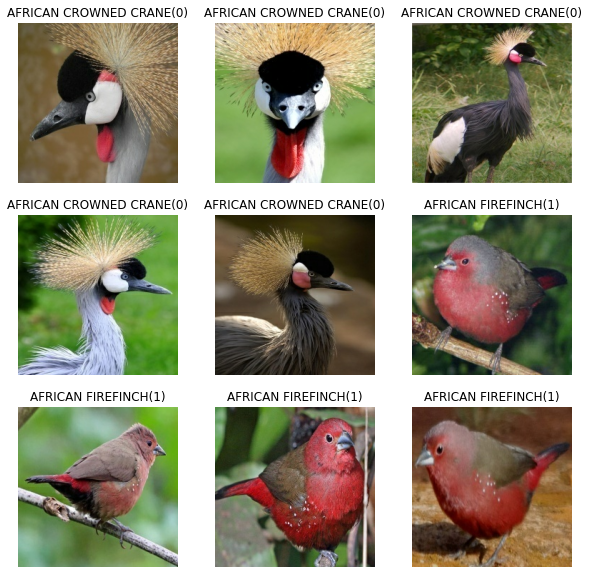

In [19]:
# visualizing the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_gen.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title((class_names[np.argmax(labels[i])] + '(' + str(int(np.argmax(labels[i]))) + ')'))
        plt.axis("off")

In [115]:
# resnet50v2 with lr schedule
model_gap = keras.models.load_model('drive/MyDrive/Newcastle University/Deep Learning/Models/ResNet50V2_gap_ft.h5')


In [116]:
# prediction -> yhat and labels -> y
predictions = np.array([])
labels =  np.array([])
for x, y in test_gen:
  predictions = np.concatenate([predictions, np.argmax(model_gap.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

In [117]:
accuracy_score(labels, predictions)

0.9696

In [118]:
precision_score(labels, predictions, average='weighted')

0.9735047619047619

In [119]:
recall_score(labels, predictions, average='weighted')

0.9696

In [120]:
f1_score(labels, predictions, average='weighted')

0.9689030303030302

In [121]:
cm = confusion_matrix(labels, predictions)
cm

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]])

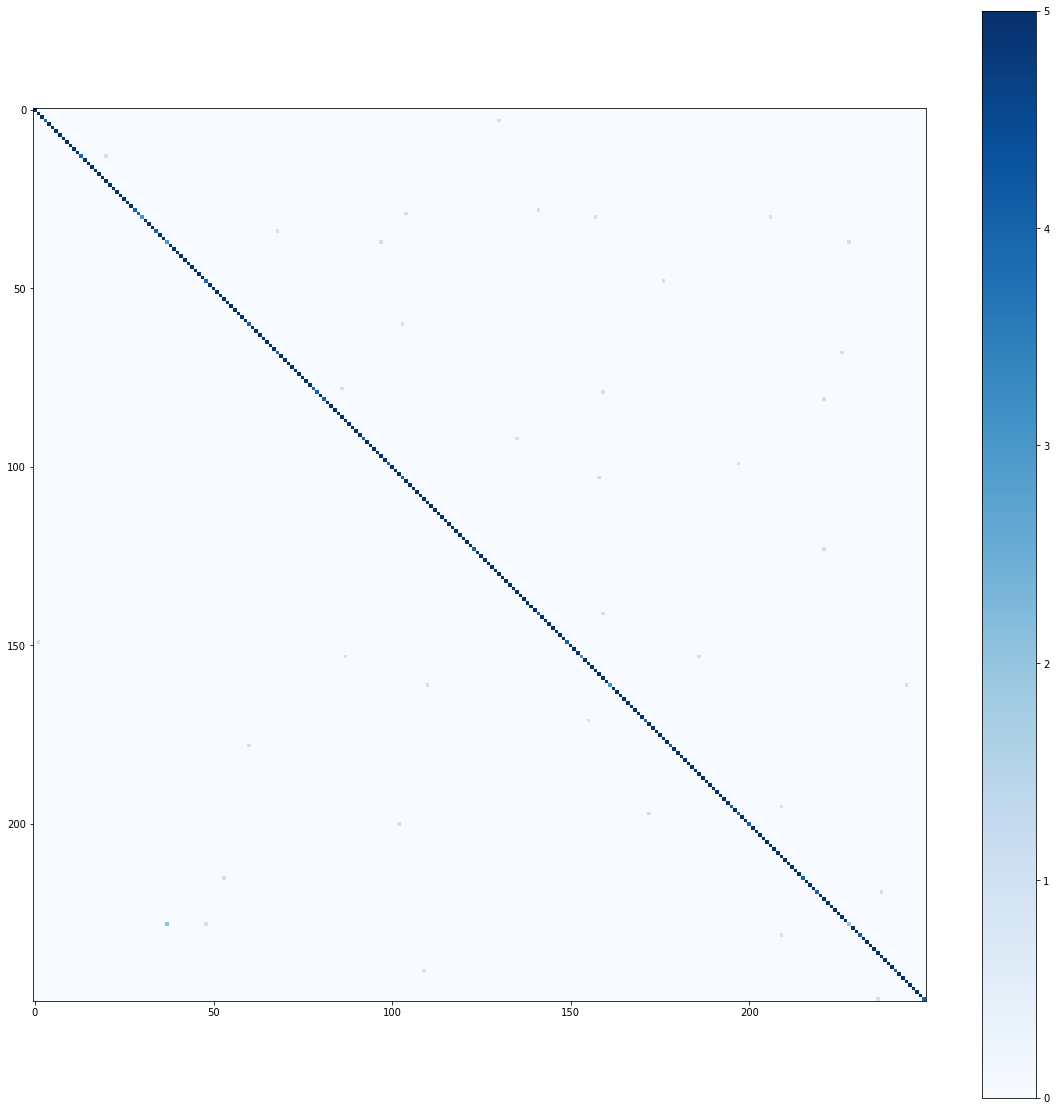

In [122]:
df_cm = pd.DataFrame(cm, index = [i for i in range(250)],
                  columns = [i for i in range(250)])
plt.figure(figsize = (20,20))
plt.imshow(df_cm, cmap='Blues')
plt.colorbar(orientation='vertical', aspect=20)

In [126]:
# resnet50v2 with lr schedule
model_gap = keras.models.load_model('drive/MyDrive/Newcastle University/Deep Learning/Models/ResNet50V2_gap_ft_run02.h5')


In [127]:
# prediction -> yhat and labels -> y
predictions = np.array([])
labels =  np.array([])
for x, y in test_gen:
  predictions = np.concatenate([predictions, np.argmax(model_gap.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

In [128]:
accuracy_score(labels, predictions)

0.9624

In [129]:
precision_score(labels, predictions, average='weighted')

0.9692047619047618

In [130]:
recall_score(labels, predictions, average='weighted')

0.9624

In [131]:
f1_score(labels, predictions, average='weighted')

0.961735508935509

In [132]:
cm = confusion_matrix(labels, predictions)
cm

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]])

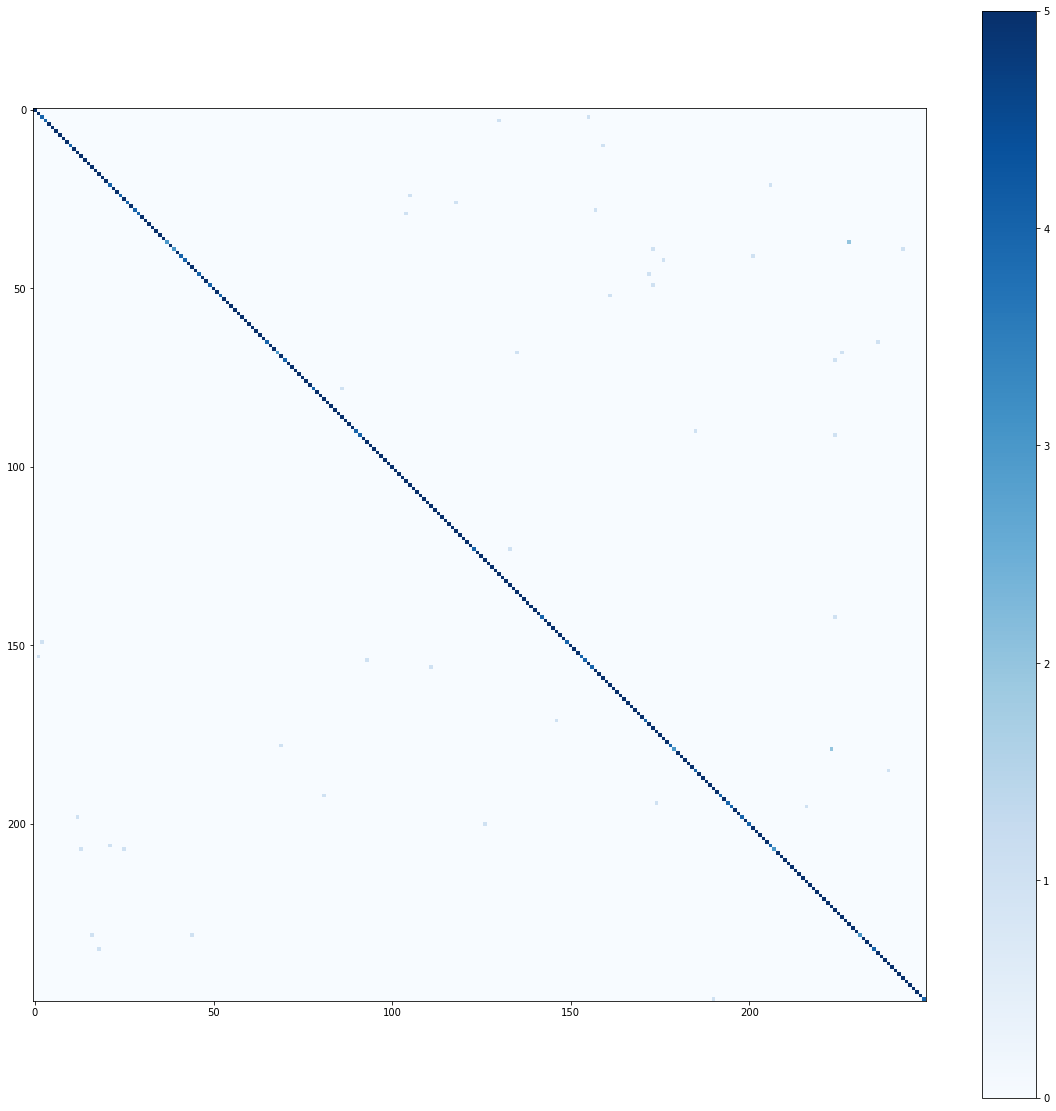

In [133]:
df_cm = pd.DataFrame(cm, index = [i for i in range(250)],
                  columns = [i for i in range(250)])
plt.figure(figsize = (20,20))
plt.imshow(df_cm, cmap='Blues')
plt.colorbar(orientation='vertical', aspect=20)

In [134]:
# resnet50v2 with static lr
model_gap = keras.models.load_model('drive/MyDrive/Newcastle University/Deep Learning/Models/ResNet50V2_gap_static_adam_ft.h5')


In [135]:
# prediction -> yhat and labels -> y
predictions = np.array([])
labels =  np.array([])
for x, y in test_gen:
  predictions = np.concatenate([predictions, np.argmax(model_gap.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

In [136]:
accuracy_score(labels, predictions)

0.9656

In [137]:
precision_score(labels, predictions, average='weighted')

0.9710142857142857

In [138]:
recall_score(labels, predictions, average='weighted')

0.9656

In [139]:
f1_score(labels, predictions, average='weighted')

0.9646344988344988

In [140]:
cm = confusion_matrix(labels, predictions)
cm

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 5]])

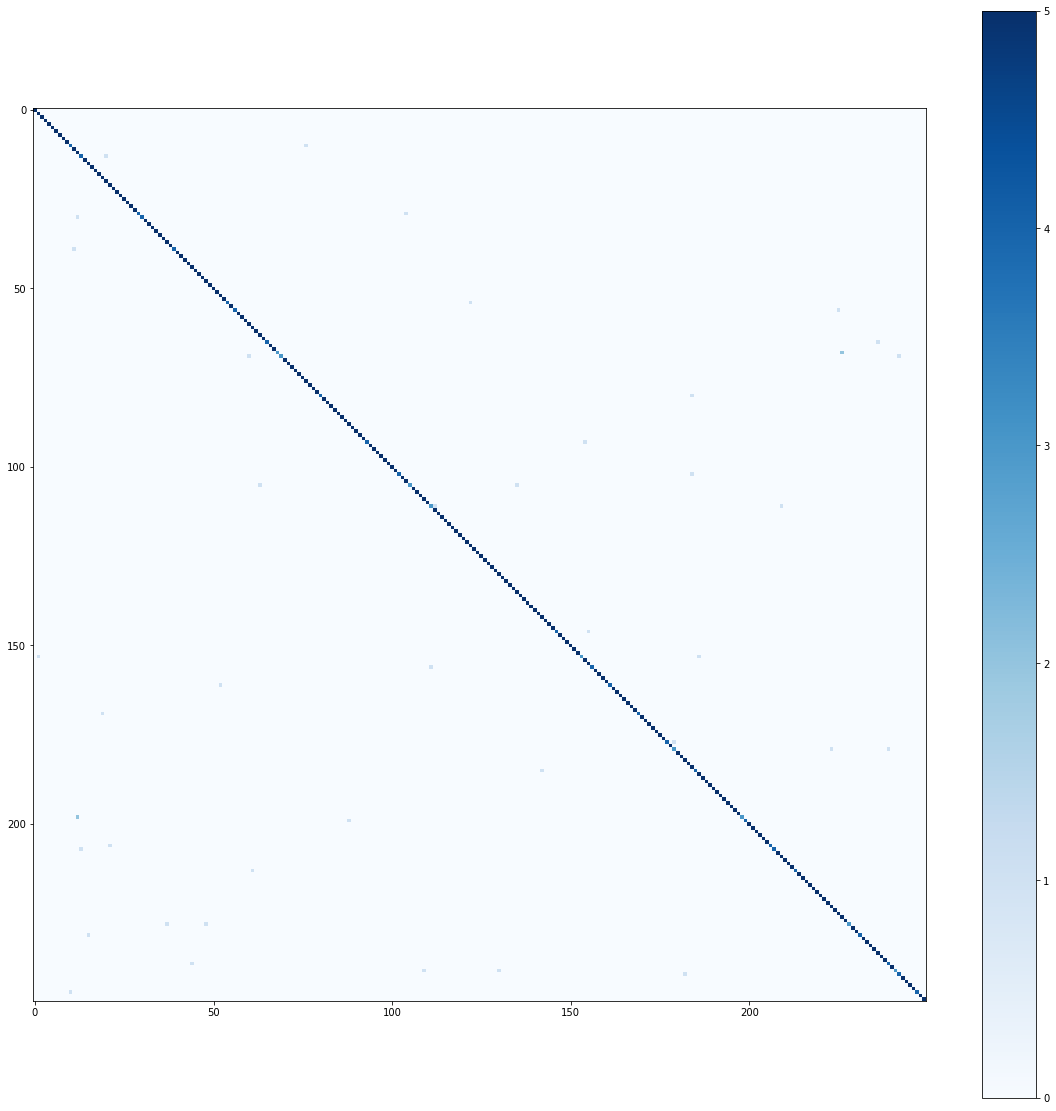

In [141]:
df_cm = pd.DataFrame(cm, index = [i for i in range(250)],
                  columns = [i for i in range(250)])
plt.figure(figsize = (20,20))
plt.imshow(df_cm, cmap='Blues')
plt.colorbar(orientation='vertical', aspect=20)

In [142]:
# resnet50v2 with static lr
model_gap = keras.models.load_model('drive/MyDrive/Newcastle University/Deep Learning/Models/ResNet50V2_gap_static_adam_ft_run02.h5')


In [143]:
# prediction -> yhat and labels -> y
predictions = np.array([])
labels =  np.array([])
for x, y in test_gen:
  predictions = np.concatenate([predictions, np.argmax(model_gap.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

In [144]:
accuracy_score(labels, predictions)

0.984

In [145]:
precision_score(labels, predictions, average='weighted')

0.9867714285714286

In [146]:
recall_score(labels, predictions, average='weighted')

0.984

In [147]:
f1_score(labels, predictions, average='weighted')

0.9838363636363636

In [148]:
cm = confusion_matrix(labels, predictions)
cm

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 5]])

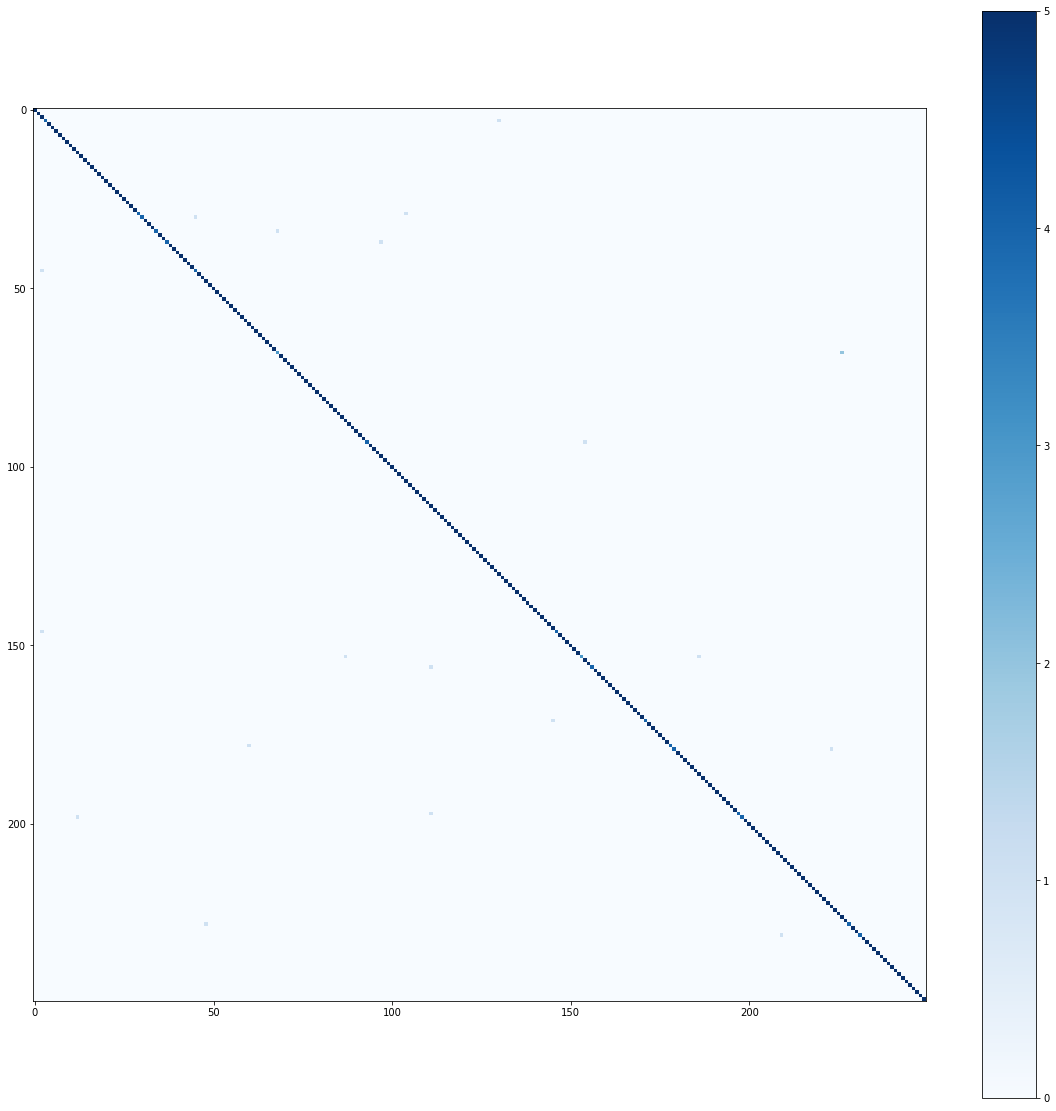

In [149]:
df_cm = pd.DataFrame(cm, index = [i for i in range(250)],
                  columns = [i for i in range(250)])
plt.figure(figsize = (20,20))
plt.imshow(df_cm, cmap='Blues')
plt.colorbar(orientation='vertical', aspect=20)

In [151]:
# resnet50v2 with static lr
model_gap = keras.models.load_model('drive/MyDrive/Newcastle University/Deep Learning/Models/ResNetV2_gap_static_adam_ft_run01.h5')


In [152]:
# prediction -> yhat and labels -> y
predictions = np.array([])
labels =  np.array([])
for x, y in test_gen:
  predictions = np.concatenate([predictions, np.argmax(model_gap.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

In [153]:
accuracy_score(labels, predictions)

0.9832

In [154]:
precision_score(labels, predictions, average='weighted')

0.9860571428571427

In [155]:
recall_score(labels, predictions, average='weighted')

0.9832

In [156]:
f1_score(labels, predictions, average='weighted')

0.9822101010101011

In [157]:
cm = confusion_matrix(labels, predictions)
cm

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]])

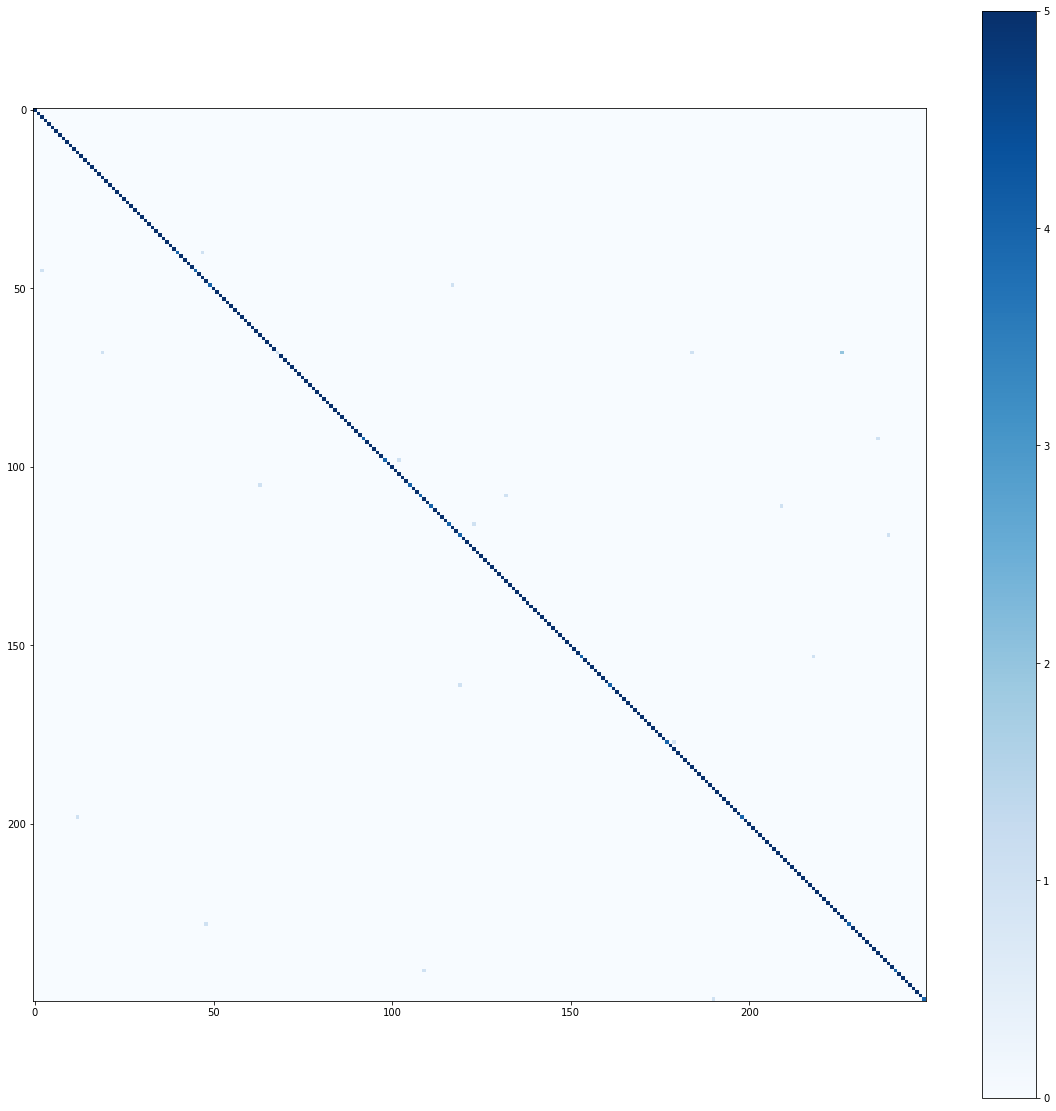

In [158]:
df_cm = pd.DataFrame(cm, index = [i for i in range(250)],
                  columns = [i for i in range(250)])
plt.figure(figsize = (20,20))
plt.imshow(df_cm, cmap='Blues')
plt.colorbar(orientation='vertical', aspect=20)